In [1]:
import pandas as pd

In [2]:
traindf = pd.read_csv('data/amazon-employee-access-challenge/train.csv')
testdf = pd.read_csv('data/amazon-employee-access-challenge/test.csv')

In [3]:
y = traindf['ACTION']
X= traindf.drop('ACTION', axis=1)
X_test = testdf.drop('id',axis=1)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1) 

In [13]:
from catboost import CatBoostClassifier, Pool

In [14]:
categorical_features = list(range(X.shape[1]))
print(categorical_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [15]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': categorical_features,
          'verbose':200,
          'random_seed':1}
catmodel_1 = CatBoostClassifier(**params)
catmodel_1.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True);

Learning rate set to 0.069882
0:	test: 0.5637606	best: 0.5637606 (0)	total: 61.7ms	remaining: 1m 1s
200:	test: 0.8963628	best: 0.8963782 (199)	total: 13.6s	remaining: 54.1s
400:	test: 0.8989021	best: 0.8989325 (392)	total: 29.7s	remaining: 44.4s
600:	test: 0.8993557	best: 0.8998863 (511)	total: 46.9s	remaining: 31.1s
800:	test: 0.9009732	best: 0.9009732 (800)	total: 1m 3s	remaining: 15.7s
999:	test: 0.9002624	best: 0.9012478 (820)	total: 1m 19s	remaining: 0us

bestTest = 0.9012478381
bestIteration = 820

Shrink model to first 821 iterations.
Wall time: 1min 20s


In [8]:
feature_imp = catmodel_1.get_feature_importance(prettified=True)
feature_imp

,Feature Id,Importances
0,RESOURCE,19.011684
1,ROLE_DEPTNAME,16.973756
2,MGR_ID,13.928303
3,ROLE_ROLLUP_2,13.316408
4,ROLE_TITLE,9.475144
5,ROLE_FAMILY_DESC,8.930017
6,ROLE_ROLLUP_1,8.178098
7,ROLE_FAMILY,7.388187
8,ROLE_CODE,2.798402


<AxesSubplot:xlabel='Importances', ylabel='Feature Id'>

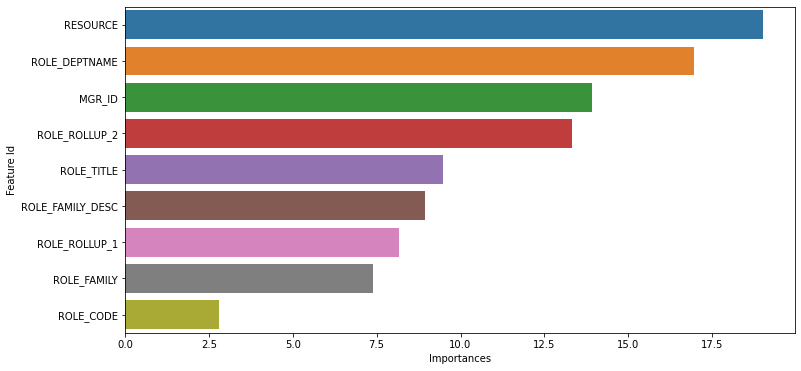

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6));
sns.barplot(x='Importances', y='Feature Id', data=feature_imp)

In [11]:
predictions=catmodel_1.predict_proba(X_test)
predictions

array([[0.31746544, 0.68253456],
       [0.00971627, 0.99028373],
       [0.00720064, 0.99279936],
       ...,
       [0.00954754, 0.99045246],
       [0.03551281, 0.96448719],
       [0.011599  , 0.988401  ]])

In [12]:
predictions=catmodel_1.predict(X_test)
print(predictions)

[1 1 1 ... 1 1 1]
